# USE CASE 1: SHALLOW ML ALGORITHM FOR CLASSIFICATION
The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

It is a multi-class classification problem, but could also be framed as a binary classification problem if we want to predict if a wine is of a particular quality or not. There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:

### Column description:
1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

We will create a new column called 'is_med_quality' if the quality of the wine is 6 or not.

In [10]:
!pip3 install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 636 kB 49.5 MB/s 
     |████████████████████████████████| 2.0 MB 43.0 MB/s 
     |████████████████████████████████| 167 kB 54.1 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 1.7 MB 37.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 30.3 MB/s 
     |████████████████████████████████| 262 kB 64.5 MB/s 
     |████████████████████████████████| 17.9 MB 470 kB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 125 kB 44.8 MB/s 
     |████████████████████████████████| 1.3 MB 38.3 MB/s 
     |████████████████████████████████| 10.4 MB 38.3 MB/s 
     |█████████████████

In [11]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [12]:
import pandas as pd
import numpy as np

# Loading the dataset as Pandas Dataframe and printing the last 5 rows of data
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
dataset.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [13]:
# Distribution of instances by quality. Most wines have the quality value as 6.
dataset.groupby(['quality']).agg(group_size = ('quality', 'size')).reset_index()

,quality,group_size
0,3,20
1,4,163
2,5,1457
3,6,2198
4,7,880
5,8,175
6,9,5


In [14]:
# Creating a new variable 'is_med_quality' 
# where it has a value of 1 if quality is 6 and 0 otherwise
dataset['is_med_quality'] = np.where(dataset['quality'] == 6, 1, 0)

# Drop quality variable
dataset = dataset.drop('quality', axis=1)  

# Print the number of instances in both the classes.  
temp = dataset.groupby(['is_med_quality']).agg(group_size = ('is_med_quality', 'size')).reset_index()
print(temp, '\n')

# Split the dataset into two parts: 90% data for training and 10% for evaluation of model
data = dataset.sample(frac=0.9, random_state=123).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

# Printing the number of instances in traning and evaluation data
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

dataset.tail()


   is_med_quality  group_size
0               0        2700
1               1        2198 

Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_med_quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1


In [15]:
from pycaret.classification import *

# Compare the performance of multiple ML classification models
experiment_1 = setup(data = data, target = 'is_med_quality', session_id=123) 
compare_models(fold = 4, sort= 'Accuracy', include = ['rf', 'lightgbm', 'dt', 'lr'])

# Note: Press 'enter' from your keyboard at input prompt to continue

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6820,0.7717,0.5872,0.6599,0.6212,0.3489,0.3507,1.6625
lightgbm,Light Gradient Boosting Machine,0.6807,0.7364,0.6178,0.6478,0.6322,0.3505,0.3510,0.1875
dt,Decision Tree Classifier,0.6480,0.6461,0.6295,0.5994,0.6139,0.2908,0.2912,0.0475
lr,Logistic Regression,0.5569,0.5916,0.2706,0.5034,0.3514,0.0592,0.0660,0.0950


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [16]:
# Build random forest ML model and tune it 
rf = create_model('rf', fold=4)
tuned_rf = tune_model(rf, choose_better = True, optimize = 'Accuracy', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6088,0.6599,0.6297,0.5524,0.5886,0.2187,0.2205
1,0.6381,0.6949,0.7456,0.5705,0.6464,0.2891,0.3000
2,0.6148,0.6665,0.6385,0.5587,0.5959,0.2310,0.2329
3,0.6213,0.6567,0.6181,0.5684,0.5922,0.2398,0.2406
Mean,0.6207,0.6695,0.6580,0.5625,0.6058,0.2447,0.2485
Std,0.0110,0.0151,0.0511,0.0073,0.0236,0.0267,0.0306


In [17]:
# Generate various plots to visualize model performance such as 
# feature importance by clicking the Plot type
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6984,0.7966,0.6419,0.6922,0.6661,0.3918,0.3928


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_med_quality,Label,Score
0,6.6,0.41,0.24,4.90,0.158,47.0,144.0,0.99471,3.17,0.49,9.4,0,0,0.74
1,6.7,0.21,0.36,8.55,0.020,20.0,86.0,0.99146,3.19,0.22,13.4,0,1,0.59
2,7.1,0.53,0.24,0.80,0.029,29.0,86.0,0.99300,3.16,0.32,9.1,0,0,0.65
3,5.1,0.35,0.26,6.80,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,1,1,0.95
4,8.3,0.14,0.45,1.50,0.039,18.0,98.0,0.99215,3.02,0.56,11.0,1,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,7.3,0.28,0.42,1.20,0.033,29.0,142.0,0.99205,3.17,0.43,10.7,0,0,0.58
1319,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,1,0,0.51
1320,7.8,0.18,0.46,13.60,0.052,38.0,118.0,0.99800,3.15,0.50,10.0,1,1,0.59
1321,7.4,0.16,0.33,1.20,0.042,47.0,121.0,0.99198,3.04,0.68,10.5,0,1,0.60


In [19]:
final_rf = finalize_model(tuned_rf)

In [20]:
evaluate_model(final_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
# Making predictions on the unseen data and seeing the last 5 rows
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9714,0.9981,0.9606,0.9889,0.9745,0.942,0.9425


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_med_quality,Label,Score
485,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1,0.90
486,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,0.82
487,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1,0.59
488,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,0,0.91
489,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1,1,0.82


In [22]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.is_med_quality, unseen_predictions.Label, 'Accuracy')

0.9714

In [23]:
# Saving the final random forest on disk. This model is ready to be deployed. 
save_model(final_rf,'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='is_med_quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       

# USE CASE 2: SHALLOW ML ALGORITHM FOR REGRESSION
Predict the price of the diamond based on its attributes. 

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Column description
1. carat: weight of the diamond (0.2--5.01)
2. cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
3. color: diamond colour, from J (worst) to D (best)
4. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
6. table: width of top of diamond relative to widest point (43--95)
7. price: price in US dollars (\$326--\$18,823)
8. x: length in mm (0--10.74)
9. y: width in mm (0--58.9)
10. z: depth in mm (0--31.8)



In [24]:
import pandas as pd
import numpy as np

# Loading the datasets as Pandas Dataframe
dataset = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')

# Splitting the dataset into seen and unseen data
data = dataset.sample(frac=0.9, random_state=123).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

dataset.head()

Data for Modeling: (48546, 10)
Unseen Data For Predictions: (5394, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
from pycaret.regression import *

# Compare the performance of multiple regression models	
experiment_2 = setup(data = data,  target = 'price', session_id=123)
compare_models(sort = 'R2', include = ['lr', 'lightgbm', 'rf', 'dt'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,294.4985,3.172773e+05,562.8601,0.9802,0.1113,0.0856,0.312
rf,Random Forest Regressor,283.4676,3.272881e+05,571.1140,0.9796,0.0960,0.0687,16.621
dt,Decision Tree Regressor,377.3960,6.080199e+05,779.5280,0.9621,0.1307,0.0899,0.258
lr,Linear Regression,743.4296,1.286633e+06,1134.1055,0.9197,0.5737,0.3899,0.049


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
# Develop and fine-tune the light GBM model
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)
evaluate_model(tuned_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,305.4854,338463.0873,581.7758,0.9779,0.1235,0.0856
1,327.9521,407561.6878,638.4056,0.9769,0.1247,0.0890
2,316.6115,363524.7070,602.9301,0.9781,0.1293,0.0880
3,306.9690,363092.9927,602.5720,0.9780,0.1185,0.0870
4,297.7095,338932.8838,582.1794,0.9783,0.1152,0.0859
5,317.6623,384211.0270,619.8476,0.9754,0.1361,0.0906
6,309.3839,351115.7320,592.5502,0.9779,0.1208,0.0877
7,312.0471,348369.3251,590.2282,0.9782,0.1125,0.0851
8,313.9949,379053.5445,615.6732,0.9761,0.1165,0.0869


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_lightgbm)
final_lightgbm = finalize_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,304.5302,348781.1696,590.577,0.978,0.1264,0.0883


In [28]:
predict_model(final_lightgbm)
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,252.1279,211419.3095,459.8036,0.9867,0.1175,0.0792


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,152.175,51492.6649,226.92,0.8428,0.116,0.0734


,carat,cut,color,clarity,depth,table,price,x,y,z,Label
0,0.61,Very Good,F,VS2,61.8,56.0,1989,5.42,5.46,3.36,1952.151757
1,0.72,Very Good,J,SI1,63.0,58.0,1989,5.67,5.70,3.58,1748.455453
2,0.74,Good,H,VS2,59.2,64.0,1989,5.79,5.66,3.40,2138.917103
3,0.65,Ideal,E,SI1,62.7,54.0,1989,5.58,5.56,3.49,2073.322465
4,0.54,Premium,F,VS2,62.0,59.0,1989,5.22,5.16,3.22,1705.712407


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.Label, 'R2')


0.8428

# USE CASE 3: DEEP LEARNING ALGORITHM FOR MULTI-CLASS IMAGE CLASSIFICATION
Predict images of fashion products from fashion-MNSIT dataset.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


[9 0 0 3 0 2 7 2 5 5]


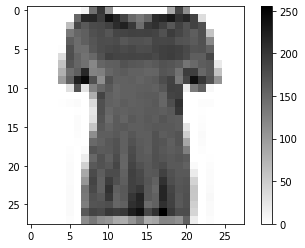

In [4]:
print(train_labels[:10])

# Create a mapping of labels (0-9) and their corresponding product class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.colorbar()

train_images = train_images / 255.0
test_images = test_images / 255.0

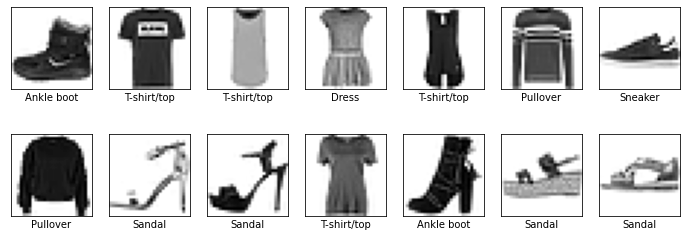

In [5]:
def plot(images, labels, predictions = None):
  """ Plot 14 images from the training data or test data 
  
      Parameters
      ----------
      images: list
          This is the list of fashion product images of which a subset of 14 images are to be plotted (displayed)
      labels: list
          This is a list of labels (0-9) of the fashion products corresponding to the images. 
      flag: Boolean
          This is set to True for showing training images and False for showing predicted labels on test images
  """
  plt.figure(figsize=(12, 16))
  for i in range(14):
    plt.subplot(7, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    if predictions is None:
      plt.xlabel(class_names[labels[i]])
    else:                           # Set label color to red if prediction doesn't match actual
      plt.xlabel("{:2.1f}% {}".format(100*np.max(predictions[i]),
                                      class_names[np.argmax(predictions[i])]),
                                      color = 'red' if np.argmax(predictions[i]) != labels[i] else 'black') 
  return plt

# Plotting the first 14 images in training data and their labels
plot(train_images, train_labels).show()


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest data accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5464 - accuracy: 0.8145
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4169 - accuracy: 0.8535
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8648
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3601 - accuracy: 0.8719
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3417 - accuracy: 0.8778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8807
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3197 - accuracy: 0.8843
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8867
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.8900
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.295

>> Prediction for first test image 
 [4.4575954e-06 1.1004806e-09 7.1186224e-07 5.0013829e-09 6.6663112e-08
 5.4795805e-02 7.0111724e-07 4.7943085e-02 9.0580979e-05 8.9716458e-01] 

>> Rounding the prediction values: [0.   0.   0.   0.   0.   0.05 0.   0.05 0.   0.9 ] 

>> Probability of the image being each product class:
Label: 0 	probability: 0.0 	product name: T-shirt/top
Label: 1 	probability: 0.0 	product name: Trouser
Label: 2 	probability: 0.0 	product name: Pullover
Label: 3 	probability: 0.0 	product name: Dress
Label: 4 	probability: 0.0 	product name: Coat
Label: 5 	probability: 0.05 	product name: Sandal
Label: 6 	probability: 0.0 	product name: Shirt
Label: 7 	probability: 0.05 	product name: Sneaker
Label: 8 	probability: 0.0 	product name: Bag
Label: 9 	probability: 0.9 	product name: Ankle boot

>> Label with the highest probability: 9 | Predicted class: Ankle boot | Actual class: Ankle boot


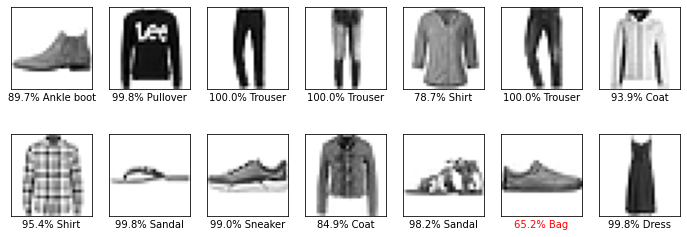

In [7]:
predictions = model.predict(test_images)

print(">> Prediction for first test image \n", predictions[0], "\n")
print(">> Rounding the prediction values:", (np.around(predictions[0],2)), "\n")

# Probability of image being each product class
print(">> Probability of the image being each product class:")
for i in range(10):
  print("Label:",i, "\tprobability:", np.around(predictions[0][i],2),"\tproduct name:",class_names[i])

# Class corresponding to the label with the highest probability is chosen 
print("\n>> Label with the highest probability:", np.argmax(predictions[0]), 
      "| Predicted class:", class_names[np.argmax(predictions[0])],
      "| Actual class:", class_names[test_labels[0]])

# Check what label the ANN predicted for the first 14 test images
plot(test_images, test_labels, predictions).show()

## Doing the same image classification using a CNN now.

In [8]:
# reshape dataset to have a single channel
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# Build and train CNN model
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_CNN.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

# Train the CNN on training images
model_CNN.fit(train_images, train_labels, epochs=10)

# Get model accuracy on test images
test_loss, test_acc = model_CNN.evaluate(test_images,  test_labels, verbose=2)
print('\nTest data accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4012 - accuracy: 0.8580
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2715 - accuracy: 0.9025
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2286 - accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1970 - accuracy: 0.9272
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1705 - accuracy: 0.9377
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1474 - accuracy: 0.9455
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1285 - accuracy: 0.9520
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1099 - accuracy: 0.9600
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0965 - accuracy: 0.9643
Epoch 10/10
1875/1875 [==============================] - 56s 30m

(60000, 28, 28, 1)


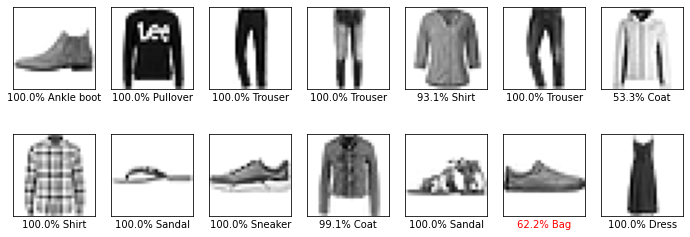

In [9]:
print(train_images.shape)

# Check what label the CNN predicted for the first 14 test images
predictions = model_CNN.predict(test_images)
plot(test_images[:,:,:,0], test_labels, predictions).show()